Predict whether a person will have breast cancer or not

In [ ]:
#Importing the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score


In [60]:
#Import the dataset

df = pd.read_csv('C:/Users/USER/Desktop/data science AFRICDSA/Datasets/Breast Cancer Diagnosis.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [61]:
df.shape

(569, 32)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [63]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [64]:
#Checking for duplicates

df.duplicated().sum()

0

No duplicates

In [65]:
#Checking for nulls

df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No nulls

In [66]:
#Checking the columns in our dataset

for i in df.columns:
    print(i)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


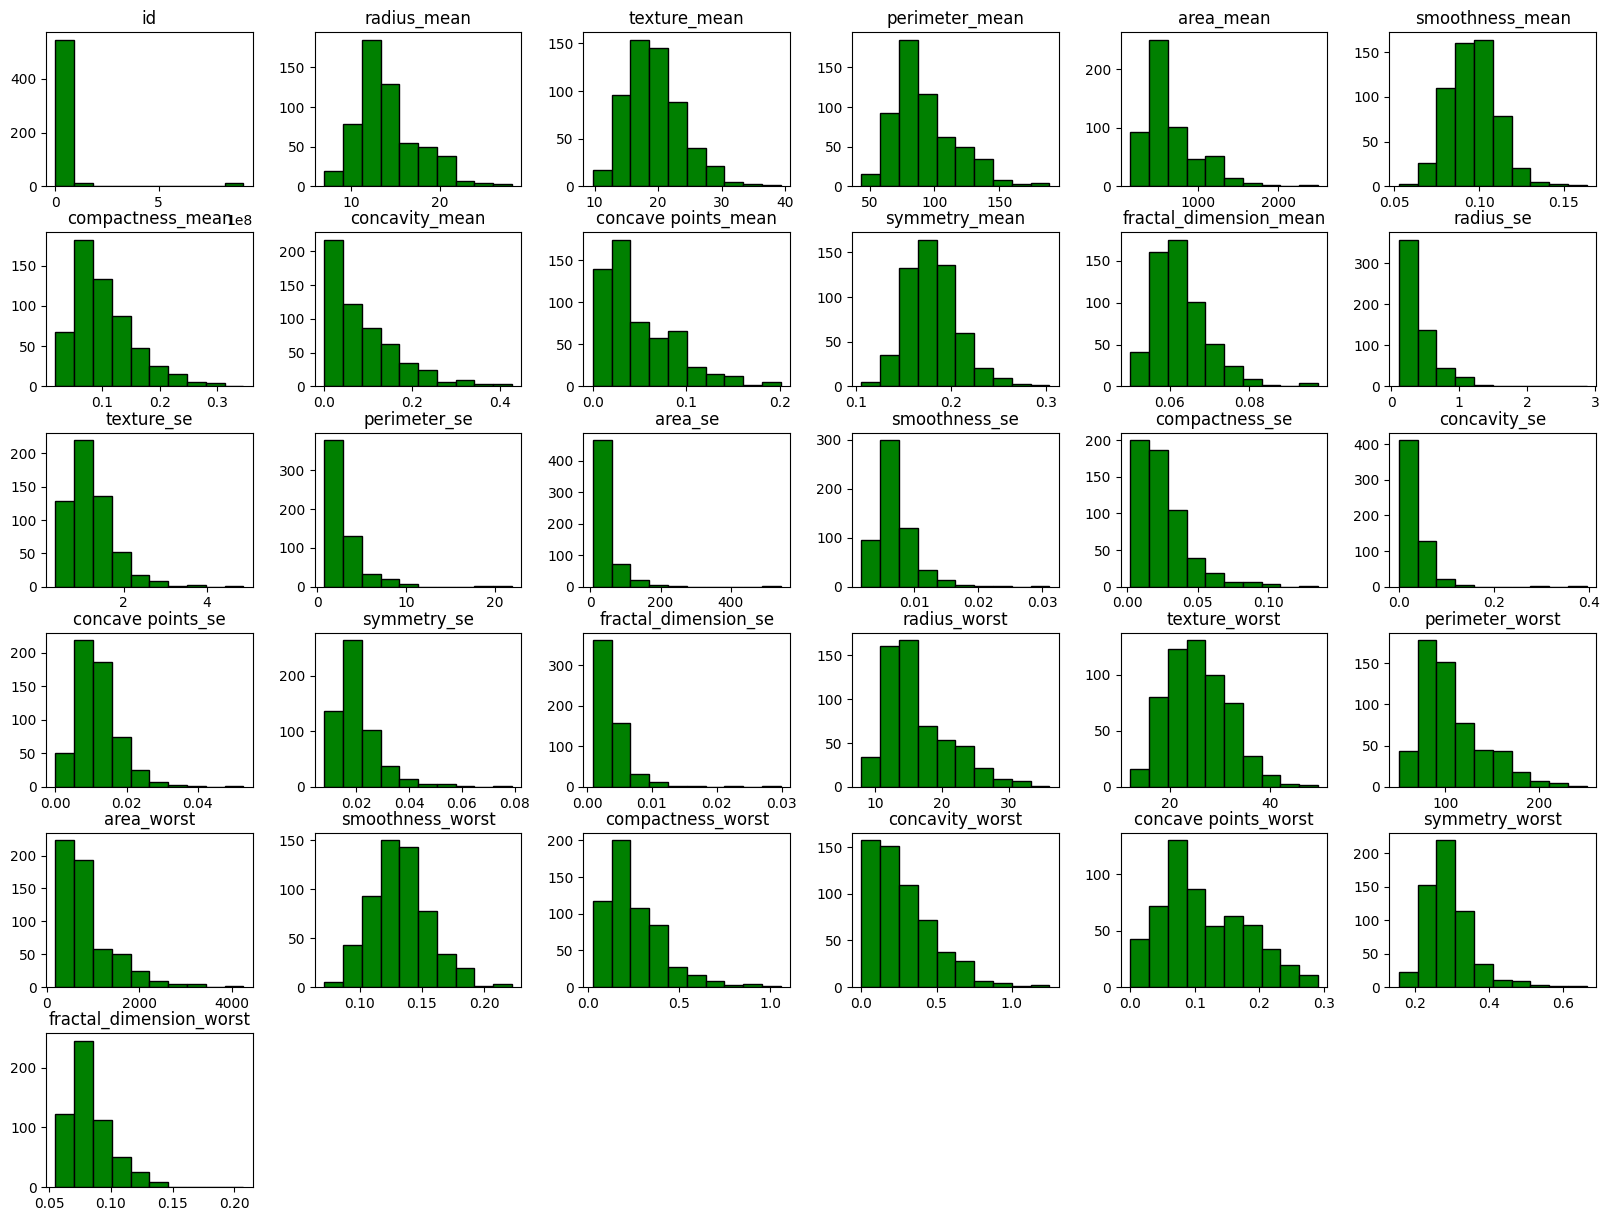

In [10]:
#Making visualizations

#1. Histograms
plt.rcParams['figure.figsize'] = (20,15)
df.hist(color = 'green', bins=10, edgecolor = 'black', grid = False)
plt.show()

In [67]:
#Removing outliers

df = df.drop(columns='id') #dropping the id column

df['diagnosis'] = df['diagnosis'].astype('category').cat.codes #Encoding the diagnosis column

df = df.copy()

for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1 - IQR*1.5
    upper_bound = Q3 + IQR*1.5
    
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
    
print(df.shape)

(277, 31)


In [70]:
#correlation matrix

matrix = df.corr()
matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.312496,0.278581,0.324481,0.334084,0.100188,0.210681,0.444722,0.423595,0.033531,...,0.429559,0.327700,0.431658,0.464664,0.178275,0.274518,0.411858,0.433239,0.109576,0.092933
radius_mean,0.312496,1.000000,0.098912,0.998029,0.995781,-0.091068,0.298559,0.434178,0.554701,-0.083728,...,0.960010,0.077381,0.952612,0.947133,-0.201197,0.311379,0.369832,0.523878,-0.077950,-0.211790
texture_mean,0.278581,0.098912,1.000000,0.101699,0.102452,-0.145048,0.052245,0.140728,0.044810,-0.026563,...,0.134784,0.915850,0.132723,0.141961,-0.069246,0.105710,0.139326,0.087487,-0.076551,-0.034567
perimeter_mean,0.324481,0.998029,0.101699,1.000000,0.993575,-0.049692,0.354838,0.479151,0.593517,-0.056259,...,0.961419,0.082054,0.959464,0.948466,-0.166101,0.359173,0.409636,0.560176,-0.054522,-0.171598
area_mean,0.334084,0.995781,0.102452,0.993575,1.000000,-0.104641,0.285362,0.440086,0.555041,-0.087951,...,0.959951,0.080790,0.952524,0.955705,-0.204442,0.304844,0.373543,0.522100,-0.084516,-0.212394
smoothness_mean,0.100188,-0.091068,-0.145048,-0.049692,-0.104641,1.000000,0.680442,0.404299,0.525072,0.394225,...,-0.047510,-0.089249,-0.014761,-0.060887,0.780201,0.335255,0.253826,0.417630,0.273165,0.430924
compactness_mean,0.210681,0.298559,0.052245,0.354838,0.285362,0.680442,1.000000,0.765334,0.765986,0.411677,...,0.330803,0.067112,0.400661,0.313914,0.504948,0.803175,0.655360,0.708257,0.318485,0.550898
concavity_mean,0.444722,0.434178,0.140728,0.479151,0.440086,0.404299,0.765334,1.000000,0.858145,0.296817,...,0.474015,0.178034,0.531735,0.478111,0.366124,0.721295,0.871724,0.796971,0.218880,0.357772
concave points_mean,0.423595,0.554701,0.044810,0.593517,0.555041,0.525072,0.765986,0.858145,1.000000,0.274055,...,0.580661,0.077680,0.620854,0.575155,0.389435,0.590491,0.638008,0.864133,0.162583,0.236100
symmetry_mean,0.033531,-0.083728,-0.026563,-0.056259,-0.087951,0.394225,0.411677,0.296817,0.274055,1.000000,...,-0.063793,-0.013651,-0.023013,-0.073930,0.274367,0.281615,0.227579,0.246753,0.642203,0.204007


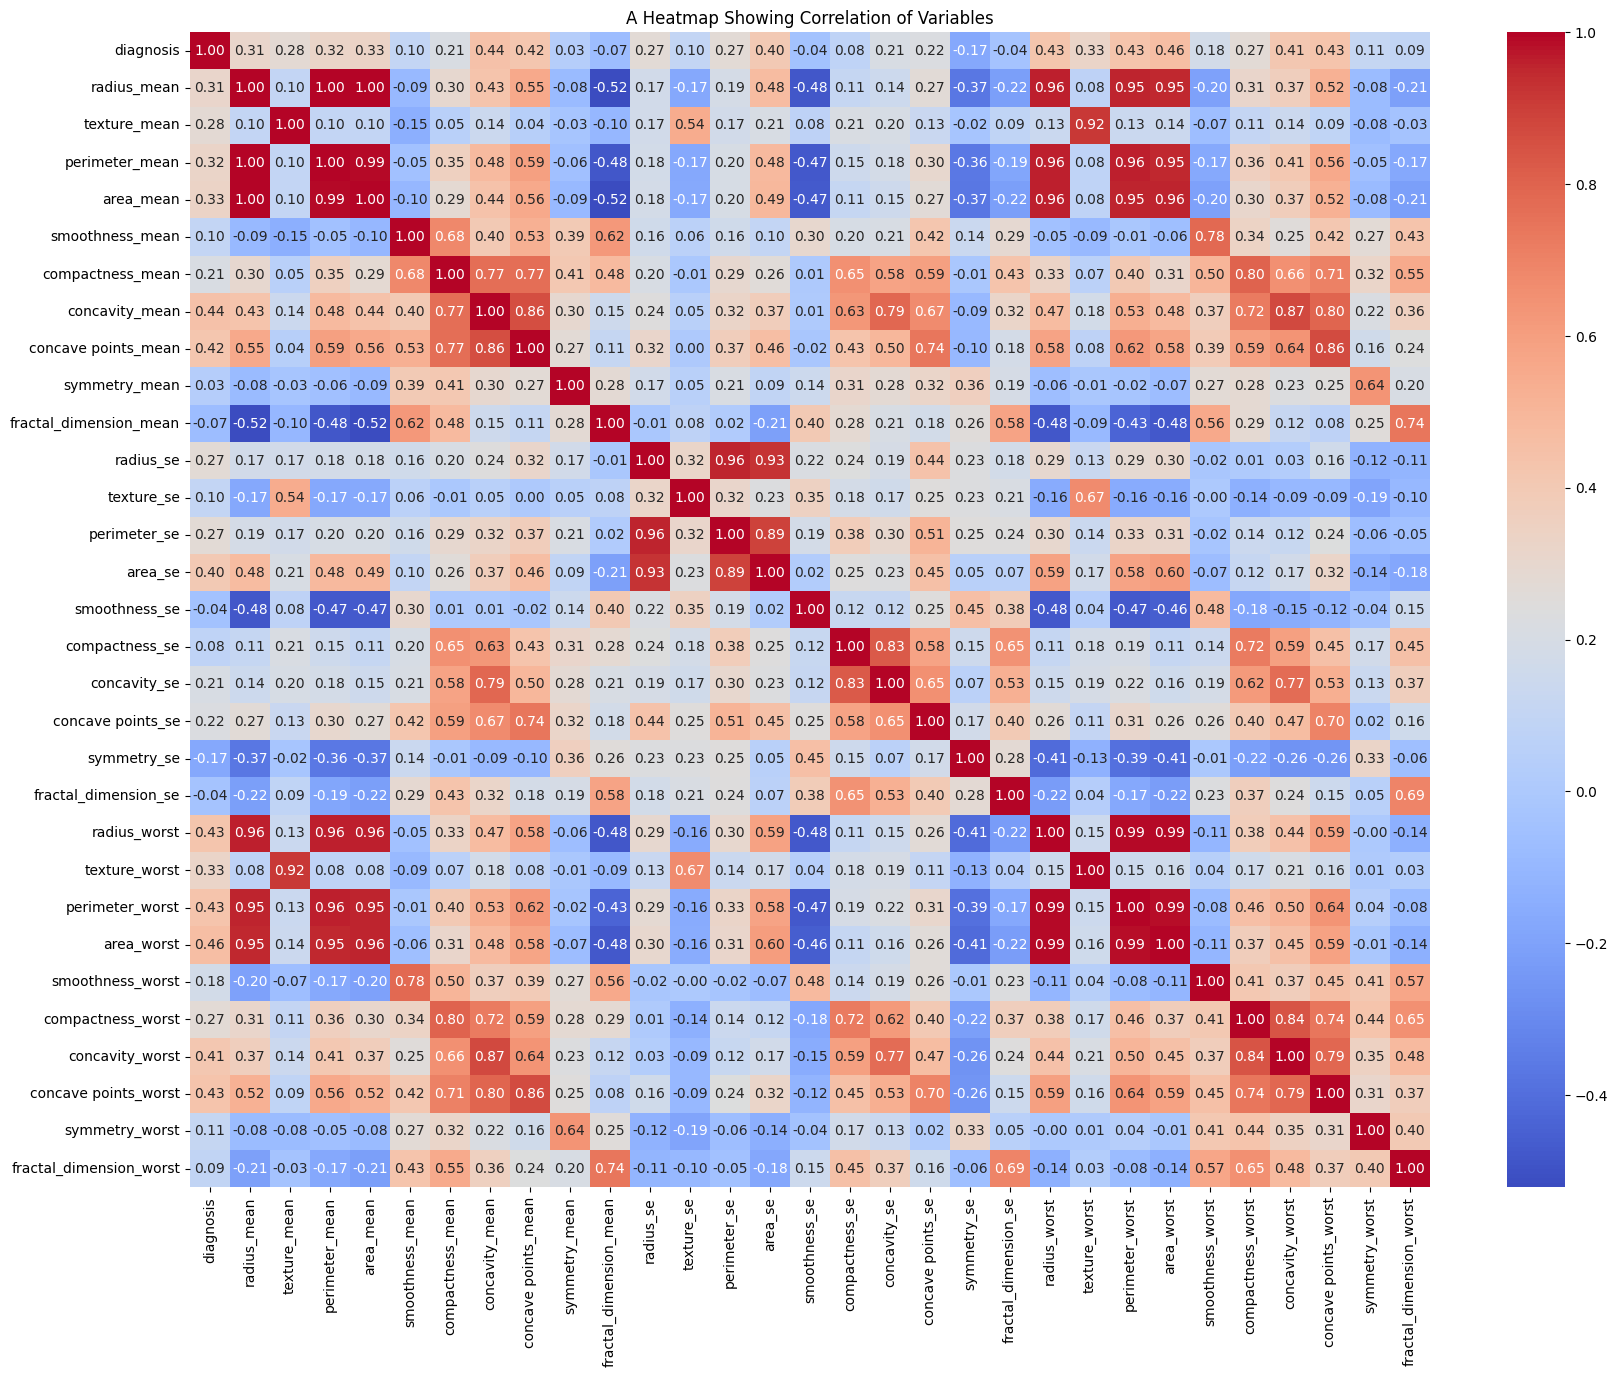

In [71]:
#Heatmap

sns.heatmap(matrix, cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title('A Heatmap Showing Correlation of Variables')
plt.show()

In [75]:
#Feature Engineering

x = df.drop(columns= 'diagnosis')
y = df['diagnosis']


In [77]:
#Splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)



In [113]:
#Using the knn model

knn = KNeighborsClassifier(n_neighbors=10, p = 2, metric= 'euclidean')
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
accuracy = accuracy_score(y_predict, y_test)
print('The accuracy of the Knn model is=', round(accuracy, 2))



The accuracy of the Knn model is= 0.95


In [110]:
#using Logistic regression

log = LogisticRegression()
log.fit(x_train, y_train)
y_predict = log.predict(x_test)
accuracy = accuracy_score(y_predict, y_test)
print('The accuracy of the Logistic Regression model is=', round(accuracy, 2))

matrix = confusion_matrix(y_predict, y_test)
print('\nMatrix = \n',matrix)

The accuracy of the Logistic Regression model is= 0.95

Matrix = 
 [[53  3]
 [ 0  0]]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
#Using Random Forest classifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)
accuracy = accuracy_score(y_predict, y_test)
print('The accuracy of the Random Forest Cassifier Model is =', round(accuracy, 2))

The accuracy of the Random Forest Cassifier Model is = 0.95


All the three models seem to be having the same accuracy score of 0.95